In [176]:
import pandas as pd
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt

In [177]:
df = pd.DataFrame.from_csv("data//40x 0_70NA//cropped//plot//no_diffuser_1_5.csv")

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [178]:
df.head()

,Y
X,
0.0,572.922
1.0,577.598
2.0,578.445
3.0,566.474
4.0,560.143


In [179]:
dist = np.asarray(df['Y'])
#dist_10 = np.asarray(df['10cm'])
#dist_20 = np.asarray(df['20cm'])
#dist_30 = np.asarray(df['30cm'])
#no_diffuser = np.asarray(df['No Diffuser'])

In [180]:
def test_func(x, a, b, c, d):
    #print(type(b))
    #return a*np.sin(np.float64(0.7)*x+c) + d
    return a*np.sin(b*x+c) + d

def fit_sine(wave):
    # https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy/42322656
    guess_mean = np.mean(wave)
    guess_std = 3*np.std(wave)/(2**0.5)/(2**0.5)
    guess_freq =  1.1 #0.7
    guess_phase = 0
    guess_amp = np.max(wave)-np.min(wave)
    
    bounds = ([0.1,1,-np.pi,-np.inf],[np.inf,1.5,np.pi,np.inf])
    
    return optimize.curve_fit(test_func, range(len(wave)), wave, bounds=bounds, p0=[guess_amp, guess_freq, guess_phase, guess_mean])
def contrast_window(wave,window_width,shift):
    w = wave[shift:window_width+shift]
    params, params_covariance = fit_sine(w)
    
    fit_vals = test_func(range(len(w)), params[0], params[1], params[2], params[3])
    
    #plt.figure(figsize=(6, 4))
    #plt.scatter(range(len(w)), w)
    
    #plt.plot(range(len(w)), fit_vals,label='Fitted function')
    #plt.savefig(f'data//40x 0_70NA//cropped//plot//1_1_{shift}.png')
    
    #perr = np.sqrt(np.diag(params_covariance))
    
    err = np.mean(np.abs(w-fit_vals))
    contrast = params[0]/(params[0]/2+params[3]) # (np.max(fit_vals)-np.min(fit_vals))/(np.max(fit_vals)+np.min(fit_vals))
    
    assert params[0] > 0
    
    #print("Freq")
    #print(params[1])
    
    return contrast, err
    
def contrast_sliding_window(wave,window_width):
    error = []
    contrast = []
    for shift in range(len(wave)-(window_width*2)):
        try:
            c, e = contrast_window(wave,window_width,shift)
        except:
            c, e = contrast_window(wave,window_width+1,shift)
        error.append(e)
        contrast.append(c)
        
    return contrast, error

In [181]:
contrast_window(dist,5,0)

(0.01752876056715117, 0.9981716915091965)

In [182]:
contrast, err = contrast_sliding_window(dist,5)

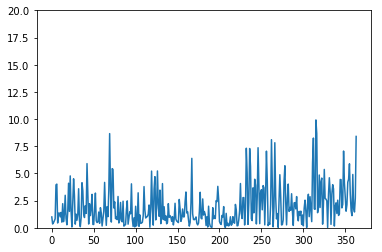

In [183]:
fig, ax = plt.subplots(1, 1)
ax.plot(err)
ax.set_ylim(top=20,bottom=0)
plt.savefig(f'data//40x 0_70NA//cropped//plot//1_5_error.png')

In [184]:
print(np.mean(contrast))
print(np.std(contrast))

0.027333393923538285
0.011743837560827567


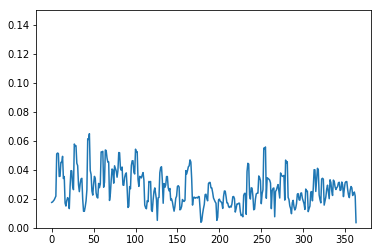

In [185]:
fig, ax = plt.subplots(1, 1)
ax.plot(contrast)
ax.set_ylim(top=0.15,bottom=0)
fig.savefig(f'data//40x 0_70NA//cropped//plot//1_5.png')